# Analysis of the rankings obtained in the EmailEU hypergraph

### NOTE: the calculation crashes (I think lack of RAM) when trying to compute the UPHEC-5....

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import scienceplots

plt.style.use(['science', 'no-latex'])

from collections import defaultdict

In [2]:
df = pandas.read_csv("../Output/email-eu_dataframe.csv")

In [3]:
df

,CEC,UPHEC-2,UPHEC-3,UPHEC-4,HEC-2unif,HEC-8unif,HEC-6unif,HEC-4unif,HEC-3unif,HEC-5unif,...,HEC-34unif,HEC-33unif,HEC-39unif,HEC-40unif,HEC-31unif,HEC-32unif,HEC-37unif,AltUnif-2,AltUnif-3,AltUnif-4
0,4.060333e-04,0.001253,0.001444,0.001598,0.001204,0.001326,0.001146,0.001041,0.000667,0.001313,...,0.004058,0.018162,0.008470,0.023849,0.028352,0.010484,0.023925,0.001253,0.001444,0.001590
1,2.085870e-04,0.001221,0.001659,0.001834,0.001118,0.000516,0.003738,0.000211,0.000324,0.000599,...,0.020377,0.018162,0.008917,0.023849,0.028730,0.010484,0.023925,0.001221,0.001659,0.001825
2,2.972874e-03,0.002392,0.001275,0.001087,0.001801,0.002386,0.003911,0.009942,0.008295,0.007249,...,0.020377,0.018162,0.008919,0.023849,0.028730,0.010484,0.023925,0.002392,0.001271,0.001081
3,3.093814e-03,0.002712,0.001132,0.000765,0.002550,0.002494,0.003997,0.011122,0.009697,0.007901,...,0.004058,0.018162,0.008919,0.023849,0.028730,0.010484,0.023925,0.002712,0.001128,0.000761
4,3.654223e-03,0.002835,0.001264,0.000959,0.002987,0.002472,0.002737,0.011478,0.010103,0.007771,...,0.004058,0.010682,0.008919,0.023849,0.028730,0.020481,0.023925,0.002835,0.001260,0.000954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3.831862e-06,0.000151,0.000140,0.000114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000151,0.000144,0.000101
982,3.587755e-05,0.000319,0.000225,0.000169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000319,0.000222,0.000168
983,1.131889e-05,0.000192,0.000393,0.000510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000192,0.000392,0.000508
984,3.534088e-07,0.000045,0.000045,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000045,0.000042,0.000039


In [4]:
df.drop("AltUnif-2", axis=1, inplace=True)

We have to sort the columns before showing the KT plots. This is a bit more cumbersome than it should due to the alphabetical sorting.

In [5]:
def sortcolumns(df):

    labeldict = {"U":[], "H":[], "A":[]}
    for label in df.columns:
        if "UPHEC" in label:
            labeldict["U"].append(label)
        elif "Alt" in label:
            labeldict["A"].append(label)
        elif "CEC" not in label:
            labeldict["H"].append(label)
    
    # Sort UPHEC, AltUnif
    for key in ["U","A"]:
        labeldict[key] = sorted(labeldict[key])
    
    # Sort the remaining one according to its number
    Hmindex = [int(label.split("-")[1].split("u")[0]) for label in labeldict["H"]]
    labeldict["H"] = list(np.array(labeldict["H"])[np.argsort(Hmindex)])
     
    return df.reindex(["CEC"]+ labeldict["U"]+ labeldict["H"]+ labeldict["A"], axis=1)

In [6]:
df = sortcolumns(df)

In [7]:
#df[labeldict["U"] + labeldict["A"]]

In [8]:
df.sum() # consistency check

CEC           1.0
UPHEC-2       1.0
UPHEC-3       1.0
UPHEC-4       1.0
HEC-2unif     1.0
HEC-3unif     1.0
HEC-4unif     1.0
HEC-5unif     1.0
HEC-6unif     1.0
HEC-7unif     1.0
HEC-8unif     1.0
HEC-9unif     1.0
HEC-10unif    1.0
HEC-11unif    1.0
HEC-12unif    1.0
HEC-13unif    1.0
HEC-14unif    1.0
HEC-15unif    1.0
HEC-16unif    1.0
HEC-17unif    1.0
HEC-18unif    1.0
HEC-19unif    1.0
HEC-20unif    1.0
HEC-21unif    1.0
HEC-22unif    1.0
HEC-23unif    1.0
HEC-24unif    1.0
HEC-25unif    1.0
HEC-26unif    1.0
HEC-27unif    1.0
HEC-28unif    1.0
HEC-29unif    1.0
HEC-30unif    1.0
HEC-31unif    1.0
HEC-32unif    1.0
HEC-33unif    1.0
HEC-34unif    1.0
HEC-35unif    1.0
HEC-37unif    1.0
HEC-38unif    1.0
HEC-39unif    1.0
HEC-40unif    1.0
AltUnif-3     1.0
AltUnif-4     1.0
dtype: float64

In [9]:
#series2 = df["HEC-2unif"]
#series2[series2 > 0].count()

In [10]:
#series5 = df["AltUnif-5"]
#series5obtained

## Complete ranking - Kendall's tau

In [11]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [12]:
np.min(KT)

0.08586932655391304

In [13]:
word = "AltUnif-45sd"
word.find("-")

7

In [14]:
def findInt(col):
    index = col.find("-")
    for n in [3,2,1]:
        try:
            M = int(col[index+1:index+n])
            return str(M)
        except:
            continue

labels = [str(col)[0]+findInt(col) for col in list(df.columns)[1:]]

type_dict = defaultdict(int)
for cent in labels:
    type_dict[cent[0]] += 1
    
separators = [type_dict["U"], type_dict["H"]+type_dict["U"]]

In [15]:
len(labels)

43

In [16]:
print(labels)
print(type_dict)

['U2', 'U3', 'U4', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34', 'H35', 'H37', 'H38', 'H39', 'H40', 'A3', 'A4']
defaultdict(<class 'int'>, {'U': 3, 'H': 38, 'A': 2})


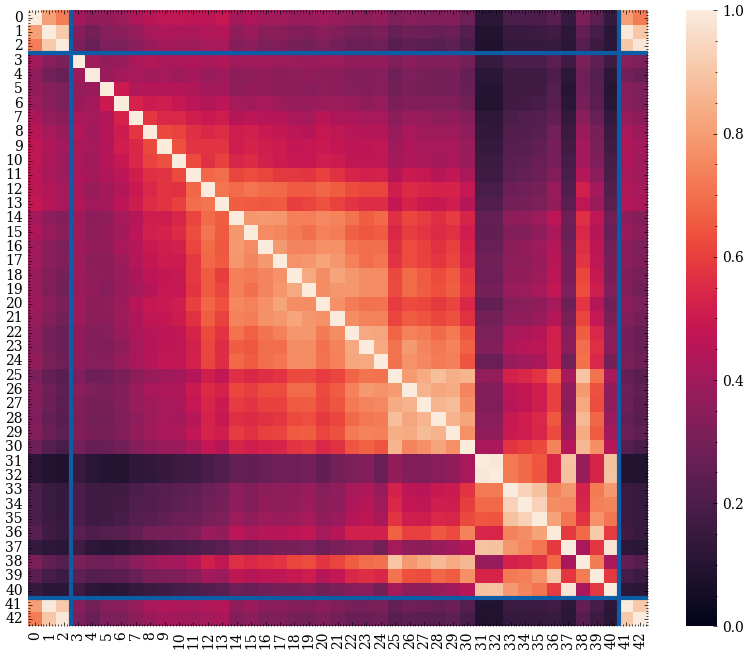

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.heatmap(KT[1:,1:], annot=False, vmin=0, vmax=1)

ax.hlines(separators, *ax.get_xlim(), linewidth=3)
ax.vlines(separators, *ax.get_ylim(), linewidth=3)

## Too many to display
#ax.set_yticklabels(labels[::2], rotation=0)
#ax.set_xticklabels(labels[::2], rotation=45)

#plt.savefig("Figures/KT_heatmap.svg")

plt.show()

## Top-K ranking


In [18]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [19]:
dictlist = df.to_dict()

In [20]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

CEC dict_keys([114, 318, 113, 417, 245, 263, 443, 333, 47, 361])
UPHEC-2 dict_keys([114, 63, 169, 128, 130, 30, 106, 113, 417, 318])
UPHEC-3 dict_keys([296, 377, 295, 60, 103, 181, 104, 368, 393, 398])
UPHEC-4 dict_keys([296, 377, 60, 104, 103, 181, 368, 389, 398, 385])
HEC-2unif dict_keys([160, 107, 62, 121, 82, 431, 249, 166, 183, 282])
HEC-3unif dict_keys([63, 58, 4, 210, 3, 2, 250, 138, 107, 717])
HEC-4unif dict_keys([62, 4, 3, 57, 2, 244, 135, 205, 636, 382])
HEC-5unif dict_keys([62, 3, 4, 2, 57, 596, 232, 132, 197, 54])
HEC-6unif dict_keys([374, 78, 44, 65, 193, 45, 64, 147, 256, 328])
HEC-7unif dict_keys([363, 75, 62, 43, 192, 44, 161, 143, 63, 325])
HEC-8unif dict_keys([358, 43, 42, 186, 356, 157, 140, 315, 60, 73])
HEC-9unif dict_keys([349, 183, 347, 155, 72, 137, 60, 41, 309, 40])
HEC-10unif dict_keys([335, 176, 333, 40, 67, 41, 58, 131, 146, 296])
HEC-11unif dict_keys([290, 162, 65, 36, 56, 37, 288, 132, 55, 117])
HEC-12unif dict_keys([64, 317, 55, 172, 315, 129, 37, 38, 54,

In [21]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    print("Comparing", key1, "against the rest.")
    
    for key2, value2 in dictlist.items():
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

Comparing CEC against the rest.
Comparing UPHEC-2 against the rest.
Comparing UPHEC-3 against the rest.
Comparing UPHEC-4 against the rest.
Comparing HEC-2unif against the rest.
Comparing HEC-3unif against the rest.
Comparing HEC-4unif against the rest.
Comparing HEC-5unif against the rest.
Comparing HEC-6unif against the rest.
Comparing HEC-7unif against the rest.
Comparing HEC-8unif against the rest.
Comparing HEC-9unif against the rest.
Comparing HEC-10unif against the rest.
Comparing HEC-11unif against the rest.
Comparing HEC-12unif against the rest.
Comparing HEC-13unif against the rest.
Comparing HEC-14unif against the rest.
Comparing HEC-15unif against the rest.
Comparing HEC-16unif against the rest.
Comparing HEC-17unif against the rest.
Comparing HEC-18unif against the rest.
Comparing HEC-19unif against the rest.
Comparing HEC-20unif against the rest.
Comparing HEC-21unif against the rest.
Comparing HEC-22unif against the rest.
Comparing HEC-23unif against the rest.
Comparing 

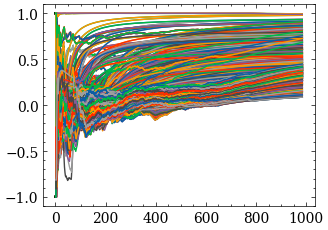

In [22]:
for key, val in KTtopK.items():
    plt.plot(val, label=key)
    
#plt.legend()

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16,10), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))

colorAA = iter(cmap(np.linspace(0, 1, 2*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        #ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        ax[0,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorUH))
        #ax[0,1].set_title("UPHEC - HEC")
    
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        ax[0,2].plot(range(11,len(df)), val[10:],
                     label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorHU))
        #ax[0,2].set_title("HEC - UPHEC")
    
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,0].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        #ax[1,0].set_title("Alt. Unif. - Alt. Unif.")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[1,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        #ax[1,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,2].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        #ax[1,2].set_title("Alt. Unif. - UPHEC")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()

plt.tight_layout()

#plt.savefig("Figures/KT_topK_comparisons.svg")

plt.show()